# Тезаурусы и другие представления значений

# Еникеева Е.В.

# 2021

# Краткое содержание

1. В задаче NER говорили о словарях предметной области (названия профессий, должностей, гео-сущностей и тд)
2. Как представить отношения в лексике? Словарь vs. граф
3. Типы графических представлений: онтология, тезаурус, семантическая сеть, фрейм ...
4. Для чего нужны такие ресурсы? Инфопоиск, WSD, диалоговые системы ...

# Как хранить лексическую информацию?

* (машинный) словарь
  - просто bag of words, словарь парадигм ...
* (традиционный) словарь
  - лексические единицы + значение (парадигматика) + особенности употребления (синтагматика) и т.д.
* лексическографические ресурсы x базы знаний
  - онтологии, тезаурусы, семантические сети

## База знаний

\- машиночитаемое представление информации о знаниях (понятиях и отношениях между ними) для некоторой предметной области

Описание с помощью:
- базы данных
- языков разметки
  - XML
Специализированные модели:
- RDF - Resource Description Framework
- OWL - Web Ontology Language

Для NLP может быть полезно:
- описание терминологии конкретной области
- описание лексической системы языка - лексические ресурсы/базы

## Онтология

\-- описание понятий и отношений между ними

- экземпляры / instances
- понятия / concepts
- атрибуты / attributes
- отношения / relations

Иерархия понятий - **таксономия**

!!! Онтология верхнего уровня (высшая онтология) - описание базовых абстрактных понятий

## Пример: drink

[Drink в Wikidata](https://www.wikidata.org/wiki/Q40050)

Пример верхнеуровневого понятия: https://www.wikidata.org/wiki/Q151885

## Тезаурус

\-- словарь лексических единиц и отношений между ними - семантический граф

То есть онтология - описание системы **понятий**, а тезаурус - **лексической системы**.

<img src="../Slides/4_Thesauri/wn-1.png" width=500/>

## Единица описания

- значение / word sense

Почему?
* омонимия и многозначность (полисемия)
* деривация: производное может быть связано с конкретным значением
* и тд

## Компоненты тезауруса

* Категории (supersense)
* Вершины : лексемы / значения / синсеты
* Ребра : семантические отношения
  * Гипо-/гиперонимия (IS A)
  * Меронимия (PART OF)
  * Причина – следствие
  * …

# WordNet

- George Miller, Christiane Fellbaum

https://wordnet.princeton.edu/

- The WordNet 3.0 : 117798 nouns, 11529 verbs, 22479 adjectives, and 4481 adverbs
- среднее количество значений для N: 1.23, для V: 2.16
- 3 базы: N(существительные), V(глаголы), A(прилагательные+наречия)

## Структура WordNet

**word** - лексема

 - **word sense** - значение

**synset** - ряд синонимичных значений
  - **gloss** ~ толкование
  
**supersense** - фиксированный набор категорий

**relation**

## Отношения в WordNet

- Hypernym / гипероним : $breakfast \rightarrow meal$
- Hyponym / гипоним : $meal \rightarrow lunch$
- Instance : $composer \rightarrow Bach$
- Meronym / has-part / мероним : $table \rightarrow leg$
- Holonym / part-of / холоним : $eye \rightarrow face$

...

- Troponym / тропоним : $walk \rightarrow stroll$
- Entails / вывод : $snore \rightarrow sleep$

## Пример

<img src="../Slides/4_Thesauri/wn-2.png" width=500/>

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/rhubarb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
len(list(wn.all_synsets()))

117659

Из них существительных:


In [11]:
len(list(wn.all_synsets('n')))

82115

А глаголов:

In [12]:
len(list(wn.all_synsets('v')))

13767

Синсет для слова можно достать вот так:

In [13]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

Можно ограничить часть речи:

In [14]:
wn.synsets('content', pos='v')

[Synset('content.v.01'), Synset('content.v.02')]

Можно посмотреть толкования:

In [15]:
word = 'day'
for synset in wn.synsets(word):
    print(word + ' - ' + synset.definition())


day - time for Earth to make a complete rotation on its axis
day - some point or period in time
day - a day assigned to a particular purpose or observance
day - the time after sunrise and before sunset while it is light outside
day - the recurring hours when you are not sleeping (especially those when you are working)
day - an era of existence or influence
day - the period of time taken by a particular planet (e.g. Mars) to make a complete rotation on its axis
day - the time for one complete rotation of the earth relative to a particular star, about 4 minutes shorter than a mean solar day
day - a period of opportunity
day - United States writer best known for his autobiographical works (1874-1935)


И даже примеры употребления:

In [16]:
word = 'day'
for synset in wn.synsets(word):
    print(word + ' - ' + ' | '.join(synset.examples()))

day - two days later they left | they put on two performances every day | there are 30,000 passengers per day
day - it should arrive any day now | after that day she never trusted him again | those were the days | these days it is not unusual
day - Mother's Day
day - the dawn turned night into day | it is easier to make the repairs in the daytime
day - my day began early this morning | it was a busy day on the stock exchange | she called it a day and went to bed
day - in the day of the dinosaurs | in the days of the Roman Empire | in the days of sailing ships | he was a successful pianist in his day
day - how long is a day on Jupiter?
day - 
day - he deserves his day in court | every dog has his day
day - 


Как перейти от одного синсета к другим, связанным с первым определённым отношением:

In [22]:
s = wn.synsets('car')[0]
#print(s.definition())
s.part_meronyms()
#help(s)

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

Антонимы только достаются не очень удобно:

In [23]:
wn.synsets('good')[2].lemmas()[0].antonyms()

[Lemma('bad.n.01.bad')]

Что-нибудь полезное для нашей предыдущей задачи (NER):

In [24]:
wn.synsets('country')[0].lemmas()

[Lemma('state.n.04.state'),
 Lemma('state.n.04.nation'),
 Lemma('state.n.04.country'),
 Lemma('state.n.04.land'),
 Lemma('state.n.04.commonwealth'),
 Lemma('state.n.04.res_publica'),
 Lemma('state.n.04.body_politic')]

Можно засунуть это все в граф и нарисовать:

In [ ]:
#!pip install networkx

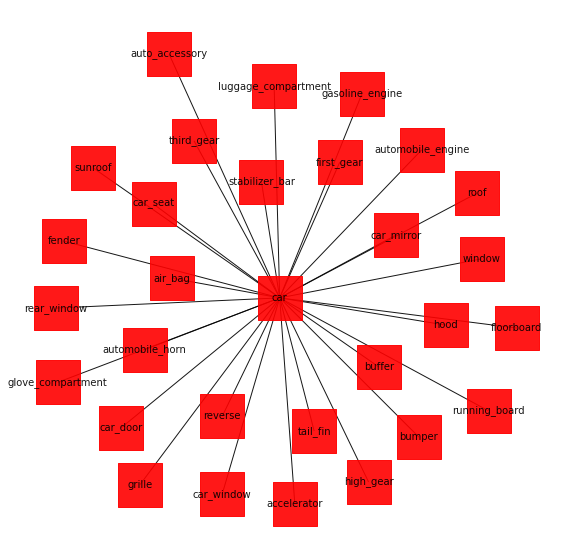

In [25]:
import networkx as nx

car = wn.synsets('car')
hyponyms = car[0].part_meronyms()

G=nx.Graph()

for w in hyponyms: 
    G.add_edge(car[0].name().split('.')[0],
               w.name().split('.')[0], 
               weight=car[0].wup_similarity(w))

plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')



# Расстояния в тезаурусе

Как оценить, насколько близки понятия/синсеты?

- Path similarity : $path = \frac{1}{|shortest\_path|}$ - чем плоха такая метрика?

<img src="../Slides/4_Thesauri/wn-3.png" width=400/>

Другие:
- Leacock & Chodorow score : $$lch(w_1,w_2) = -log{\frac{|shortest\_path(w_1,w_2)|}{2 * depth}}$$
(здесь depth - глубина всего графа)

- Wu & Palmer similarity

Введем понятие least common subsumer (LCS) - ближайший общий предок
$$wp = -log{\frac{|path(root,LCS(w_1,w_2)|}{|path(root,w_1)|*|path(root,w_2)|}}$$

- ...

In [26]:
money = wn.synsets('money')[0]
nickel = wn.synsets('nickel')[0]
print("Path similarity =", money.path_similarity(nickel))
print("Wu&Palmer =", money.wup_similarity(nickel))

Path similarity = 0.08333333333333333
Wu&Palmer = 0.26666666666666666


## Information-content measures

Что, если использовать ещё информацию из корпуса?

- Resnik similarity:
$$res(w_1,w_2) = IC(LCS(w_1,w_2))$$
где
$$IC(w)=log{\frac{freq(w)}{freq(root)}}$$,
а $freq(w)$ - сумма частот всех потомков вершины $w$


https://arxiv.org/PS_cache/cmp-lg/pdf/9511/9511007v1.pdf

In [27]:
from nltk.corpus import brown
brown_ic = wn.ic(brown)  # функция, которая готовит подсчёт частот по корпусу
print("Resnik similarity =", money.res_similarity(nickel, brown_ic))

Resnik similarity = 0.3749015605004214


# Другие тезаурусы

Multilingual:
- [BabelNet](https://www.babelnet.org/)
- [EuroWordNet](http://projects.illc.uva.nl/EuroWordNet/)
- [Wiktionary](https://www.wiktionary.org/)

Russian:
- [YARN](https://russianword.net/)
- [RussNet](http://project.phil.spbu.ru/RussNet/index_ru.shtml)
- [RuThez (РуТез)](http://www.labinform.ru/pub/ruthes/index.htm)


Похожий интерфейс у wiki_ru_wordnet - лексическая база на основе Викисловаря.

In [78]:
#!pip install wiki_ru_wordnet

In [50]:
from wiki_ru_wordnet import WikiWordnet
import re
ruwn = WikiWordnet()

In [51]:
s = ruwn.get_synsets('дерево')[0]

In [52]:
for w in s.get_words():
    print(w.lemma())
    print(w.definition())
    print()

дерево
дерево~ru~дерево~ru~{{ботан.|ru}} многолетнее, как правило, крупное [[растение]] с твёрдым [[ствол]]ом, мощной корневой системой и образующими крону ветвями, покрытыми листьями или иголками {{пример|Люди с их топорами и пилами … безжалостно губили мощные дубы, широкие осины, стройные берёзки и тополя и другие {{выдел|деревья}}.|Л. А. Чарская|Золотая свирель|1912|источник=НКРЯ}} {{пример|Туманная меланхолия неизменно накреняла {{выдел|дерева́}}. Стояли {{выдел|дерева́}} наклонённые.|Андрей Белый|Северная симфония|1917|источник=НКРЯ}} {{пример|Можжевел{{-}}{{выдел|дерево}} скрытное, колкое, не допускающее в себя, замкнутое, строгое к жизни, самое мудрое из наших {{выдел|дере́в}}.|Л. М. Леонов|Барсуки|1924|источник=НКРЯ}} {{пример|{{--}}Знаешь, по чему у {{выдел|дерёв}} считают года?..|С. А. Клычков|Чертухинский балакирь|1926|источник=НКРЯ}} {{пример|Ми́ны рвали́сь в {{выдел|дерева́х}}.|Виктор Астафьев|Весёлый солдат|дата=1987–1997||Новый Мир|дата издания=1998 г.|источник=НКРЯ}} {{

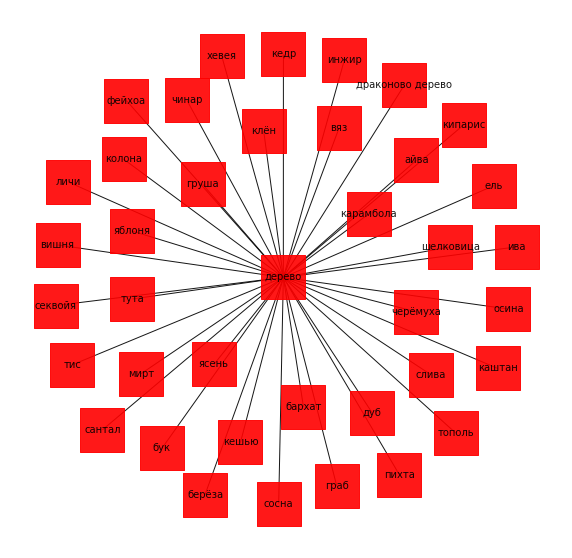

In [53]:
words = ruwn.get_synsets('дерево')
first_synset = words[0]
hyponyms = ruwn.get_hyponyms(first_synset)

G=nx.Graph()

for w in hyponyms: 
    G.add_edge('дерево',
               list(w.get_words())[0].lemma())

plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')

In [66]:
city_words = ruwn.get_synsets('город')
first_synset = city_words[0]
for h in ruwn.get_hyponyms(first_synset):
    print(list(h.get_words())[0].lemma())

Новосибирск
Банда
Ессентуки
Варшава
Москва
Измир
Адана
Газиантеп
Конья
Анталья
Кайсери
Мерсин
Эскишехир
Диярбакыр
Денизли
Шанлыурфа
Самсун
Эсеньюрт
Малатья
Адапазары
Кахраманмараш
Эрзурум
Ван
Элязыг
Султанбейли
Измит
Сивас
Гебзе
Маниса
Балыкесир
Санджактепе
Тарсус
Трабзон
Чорум
Чорлу
Каяпынар
Османие
Адыяман
Кютахья
Кырыккале
Антакья
Бейликдюзю
Бююкчекмедже
Искендерун
Айдын
Ушак
Арнавуткёй
Аксарай
Испарта
Афьон
Инегёль
Чекмекёй
Текирдаг
Эдирне
Дарыджа
Гёльджюк
Кёрфез
Орду
Сиирт
Кызылтепе
Дериндже
Мезитли
Дюздже
Токат
Болу
Менемен
Тургутлу
Силиври
Торбалы
Бандырма
Назилли
Зонгулдак
Карабюк
Сиверек
Кыршехир
Акхисар
Пурсаклар
Люлебургаз
Нигде
Джейхан
Джизре
Салихли
Чанаккале
Ялова
Низип
Аланья
Эрегли
Гиресун
Ризе
Полатлы
Агры
Бингёль
Картепе
Эрзинджан
Невшехир
Кастамону
Талас
Нусайбин
Чайырова
Мардин
Эльбистан
Бафра
Килис
Амасья
Манавгат
Кадирли
Силопи
Ыгдыр
Черкезкёй
Вираншехир
Карс
Чубук
Козан
Кемальпаша
Йодемиш
Йозгат
Юнье
Фетхие
Эрджиш
Дёртъёл
Муш
Чанкыры
Кырыкхан
Сёке
Ширнак
Хаккари


Гаврилов-Ям
Любим
Пошехонье
Тутаев
Углич
Агдаш
Агджабеди
Аджигабул
Акстафа
Астара
Ахсу
Бейлаган
Белоканы
Билясувар
Габала
Геокчай
Геранбой
Гёйгёль
Гёйтепе
Гобустан
Горадиз
Гянджа
Далимамедли
Дашкесан
Джалилабад
Джульфа
Евлах
Закаталы
Зардоб
Имишли
Исмаиллы
Кедабек
Аах
Кусары
Абенберг
Абенсберг
Августусбург
Адельсхайм
Аденау
Адорф
Айбельштадт
Айбеншток
Айзенах
Айзенберг
Айзенхюттенштадт
Айзлинген
Айленбург
Айнбек
Айслебен
Айсфельд
Айхах
Кюрдамир
Айхталь
Айхштет
Акен
Ален
Аллендорф
Альбштадт
Альпирсбах
Альсдорф
Альслебен
Альсфельд
Альтдорф-Нюрнберг
Альтена
Альтенау
Альтенберг
Альтенбург
Альтенкирхен
Альтенстайг
Альтентрептов
Альтландсберг
Альтёттинг
Миасс
Альцай
Альценау
Альштедт
Альфельд
Аморбах
Ленкорань
Амёнебург
Амберг
Ангермюнде
Андернах
Анклам
Аннаберг-Буххольц
Аннабург
Ансбах
Лерик
Апольда
Арендзее
Аренсбург
Арнебург
Арнис
Арнсберг
Арнштадт
Арнштайн
Артерн
Арцберг
Аслар
Асперг
Аттендорн
Ауб
Аугсбург
Аулендорф
Аума
Аурих
Ауэ
Ахаус
Ахен
Ахерн
Ашаффенбург
Ашерслебен
Бабенхаузен
Бад-А

Рёдермарк
Рёмхильд
Рёсрат
Рёта
Рёттинген
Рёц
Саарбрюккен
Саарбург
Саарлуис
Санкт-Августин
Санкт-Блазиен
Санкт-Вендель
Санкт-Гоар
Санкт-Гоарсхаузен
Санкт-Ингберт
Тале
Тальхайм
Тамбах-Дитарц
Тангермюнде
Тангерхютте
Танн
Танхаузен
Тарандт
Таубербишофсхайм
Таунусштайн
Тауха
Твистринген
Тегернзе
Текленбург
Тельгте
Тельтов
Темар
Тенген
Тессин
Тетеров
Тетнанг
Титизее-Нойштадт
Титмонинг
Тодтнау
Тойблиц
Тойпиц
Тойхерн
Тойшниц
Торгау
Торгелов
Торнеш
Трабен-Трарбах
Траунройт
Траунштайн
Треббин
Требзен
Трендельбург
Треффурт
Триберг
Трибзес
Триптис
Трир
Тройен
Тройенбрицен
Тройсдорф
Тройхтлинген
Троссинген
Тростберг
Трохтельфинген
Тум
Тутлинген
Тюбинген
Тёгинг-на-Инне
Тёнисфорст
Тённинг
Узедом
Узинген
Уинген
Ульм
Ульмен
Ульрихштайн
Уммерштадт
Ункель
Унна
Унтершлайсхайм
Услар
Батайск
Уффенхайм
Фаллендар
Файхинген-на-Энце
Фалькензее
Фалькенберг
Фалькенштайн
Фарель
Фаха
Фелльбах
Фельберг
Фельберт
Фельбург
Фельден
Фельмар
Фельсберг
Фельтен
Фемарн
Ферден
Калуга
Ферингенштадт
Ферль
Ферсмольд
Фехта
Фечау


Норкрос
Норман
Норт-Бранч
Нортгемптон
Норт-Литл-Рок
Норт-Манкейто
Норуолк
Норт-Окс
Нортом
Норфорк
Минеральные Воды
Нурвик
Нортроп
Ньюарк
Нортфилд
Нью-Берн
Норфлет
Норфолк
Гори
Нулато
Нью-Джермани
Нью-Алм
Нью-Бедфорд
Нью-Брайтон
Нью-Брансуик
Нью-Бритен
Ньюбург
Белинский
Нью-Йорк-Милс
Нью-Касл
Ньюпорт-Бич
Нью-Лондон
Нью-Медоус
Нью-Мьюник
Ньюнан
Нью-Оберн
Нью-Плимут
Ньюпорт
Нижний Новгород
Нью-Прейг
Нью-Ричленд
Нью-Рошелл
Ньютон
Нью-Трир
Ньюфолден
Нью-Хейвен
Ньюхейлен
Нью-Хоп
Оберлин
Оберн
Оберн-Хиллс
Оватонна
Оверленд-Парк
Огаллала
Огаста
Огден
Огденсберг
Огема
Огилви
Одибон
Окли
Одюбон
Ок-Парк-Хайтс
Окабина
Окснард
Олден
Олдрич
Василевичи
Вилейка
Олни
Воложин
Онеймия
Онеонта
Оппело
Орандж-Бич
Орем
Орландо
Ормсби
Оровилл
Ороно
Железногорск
Ороноко
Ельск
Орора
Осейкис
Осеола
Ивацевичи
Оссио
Острандер
Осуиго
Отсиго
Климовичи
Кличев
Копыль
Охай
Ошкош
Пайлот-Пойнт
Пайн-Айленд
Крупки
Оттава
Пайн-Сити
Лида
Логойск
Ляховичи
Пайн-Ривер
Марьина Горка
Миоры
Палм-Бей
Молодечно
Мосты
Пайпстон
Пампа


## РуТез
[ещё один тезаурус для русского языка](https://www.labinform.ru/pub/ruthes/index.htm)
* более 31.5 понятий, 111.5 тысяч различных текстовых входов (слов и выражений русского языка), более 130 тысяч с учетом значений многозначных слов;
* раздаётся в XML по запросу, мы будем использовать уже предобработанную версию.

In [3]:
import csv

rels_list = []
with open("4_Thesauri/relations_with_concepts.csv", newline='', encoding='utf8') as rels:
    reader = csv.DictReader(rels, delimiter="\t")
    for row in reader:
        rels_list.append(row)


def get_supc2(concept_list, rels_list, has_up=True, depth=0, max_depth=-1):
    """
    Get list of all hypernym chains of the query
    - up a level
    - add all 'выше' concepts to list
    [[level_1, level_2.1, level_3.1], [level_1, level_2.2, level_3.2], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hypernyms
    :param has_up: (internal) bool(current top concept has a superconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of superconcept for every meaning of query
    """
    new_cl = concept_list[:]
    if (not has_up) or depth >= max_depth > 0:
        return new_cl
    has_up = False
    for chain in concept_list:
        index = new_cl.index(chain)
        word = chain[-1]
        for row in rels_list:
            new_chain = chain[:]
            if row['from'].lower() == word.lower() and row['relation'] == 'ВЫШЕ':
                new_chain.append(row['to'].lower())
                new_cl.insert(index + 1, new_chain)
                has_up = True
        if has_up:
            new_cl.remove(chain)
    return get_supc2(new_cl, rels_list, has_up, depth+1, max_depth)


def get_supc(concept_list, rels_list, has_up=True, depth=0, max_depth=-1):
    """
    Find list of all hypernyms of query by level down
    [[level_1], [level_2.1, level_2.2], [level_3.1, level_3.2, level_3.3], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_up: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    if (not has_up) or depth >= max_depth > 0:
        return concept_list
    has_up = False
    new_list = []
    for word in concept_list[-1]:
        for row in rels_list:
            if row['from'].lower() == word.lower() and row['relation'] == 'ВЫШЕ':
                if all(row['to'].lower() not in hypo for hypo in concept_list):
                    new_list.append(row['to'].lower())
                    has_up = True
    if has_up:
        concept_list.append(new_list)
    return get_supc(concept_list, rels_list, has_up, depth + 1, max_depth)


def get_subc2(concept_list, rels_list, has_down=True, depth=0, max_depth=-1):
    """
    Get list of all hyponym chains for word in query
    - down a level
    - add all 'ниже' concepts to list
    [[level_1, level_2.1, level_3.1], [level_1, level_2.2, level_3.2], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_down: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    new_cl = concept_list[:]
    if (not has_down) or depth >= max_depth > 0:
        return new_cl
    for chain in concept_list:
        has_down = False
        index = new_cl.index(chain)
        word = chain[-1]
        for row in rels_list:
            new_chain = chain[:]
            if row['from'].lower() == word.lower() and row['relation'] == 'НИЖЕ':
                new_chain.append(row['to'].lower())
                new_cl.insert(index + 1, new_chain)
                has_down = True
        if has_down:
            new_cl.remove(chain)
    return get_subc2(new_cl, rels_list, has_down, depth+1, max_depth)


def get_subc(concept_list, rels_list, has_down=True, depth=0, max_depth=-1):
    """
    Find list of all hyponyms of query by level down
    [[level_1], [level_2.1, level_2.2], [level_3.1, level_3.2, level_3.3], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_down: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    if (not has_down) or depth >= max_depth > 0:
        return concept_list
    has_down = False
    new_list = []
    for word in concept_list[-1]:
        for row in rels_list:
            if row['from'].lower() == word.lower() and row['relation'] == 'НИЖЕ':
                if all(row['to'].lower() not in hypo for hypo in concept_list):
                    new_list.append(row['to'].lower())
                    has_down = True
    if has_down:
        concept_list.append(new_list)
    return get_subc(concept_list, rels_list, has_down, depth+1, max_depth)

In [4]:
get_supc([['собака'], ['кошка']], rels_list)

[['собака'],
 ['кошка'],
 ['домашнее животное', 'кошачьи'],
 ['животное', 'хищное млекопитающее'],
 ['живой организм', 'млекопитающее', 'дикое животное', 'хищное животное'],
 ['биологическая сущность', 'позвоночное животное'],
 ['физическая сущность'],
 ['постоянная сущность']]

In [5]:
get_supc2([['собака'], ["кошка"]], rels_list)

[['собака',
  'домашнее животное',
  'животное',
  'живой организм',
  'биологическая сущность',
  'физическая сущность',
  'постоянная сущность'],
 ['собака',
  'млекопитающее',
  'позвоночное животное',
  'животное',
  'живой организм',
  'биологическая сущность',
  'физическая сущность',
  'постоянная сущность'],
 ['кошка',
  'кошачьи',
  'хищное млекопитающее',
  'хищное животное',
  'животное',
  'живой организм',
  'биологическая сущность',
  'физическая сущность',
  'постоянная сущность'],
 ['кошка',
  'кошачьи',
  'хищное млекопитающее',
  'дикое животное',
  'животное',
  'живой организм',
  'биологическая сущность',
  'физическая сущность',
  'постоянная сущность'],
 ['кошка',
  'кошачьи',
  'хищное млекопитающее',
  'млекопитающее',
  'позвоночное животное',
  'животное',
  'живой организм',
  'биологическая сущность',
  'физическая сущность',
  'постоянная сущность']]

Получить все гипонимы для списка концептов (объединенные в списки по уровням).

In [6]:
get_subc([['собака']], rels_list)

[['собака'],
 ['служебная собака',
  'охотничья собака',
  'комнатная собака',
  'пудель',
  'бульдог',
  'пинчер',
  'щенок (собака)',
  'кобель (собака)',
  'беспородная собака',
  'ротвейлер',
  'лабрадор (порода собак)',
  'чихуахуа (порода собак)'],
 ['поисковая собака',
  'овчарка',
  'боксер (собака)',
  'такса (собака)',
  'волкодав',
  'лайка (собака)',
  'спаниель',
  'терьер',
  'борзая собака',
  'легавая собака',
  'болонка',
  'доберман'],
 ['немецкая овчарка',
  'кокер-спаниель',
  'питбультерьер',
  'йоркширский терьер',
  'стаффордширский терьер',
  'сеттер']]

Получить все гипонимы для списка концептов (объединенные в списки по концепту).

In [7]:
get_subc2([['собака']], rels_list)

[['собака', 'чихуахуа (порода собак)'],
 ['собака', 'лабрадор (порода собак)'],
 ['собака', 'ротвейлер'],
 ['собака', 'беспородная собака'],
 ['собака', 'кобель (собака)'],
 ['собака', 'щенок (собака)'],
 ['собака', 'пинчер', 'доберман'],
 ['собака', 'бульдог'],
 ['собака', 'пудель'],
 ['собака', 'комнатная собака', 'болонка'],
 ['собака', 'комнатная собака', 'пудель'],
 ['собака', 'охотничья собака', 'легавая собака', 'сеттер'],
 ['собака', 'охотничья собака', 'борзая собака'],
 ['собака', 'охотничья собака', 'терьер', 'стаффордширский терьер'],
 ['собака', 'охотничья собака', 'терьер', 'йоркширский терьер'],
 ['собака', 'охотничья собака', 'терьер', 'питбультерьер'],
 ['собака', 'охотничья собака', 'спаниель', 'кокер-спаниель'],
 ['собака', 'охотничья собака', 'лайка (собака)'],
 ['собака', 'охотничья собака', 'волкодав'],
 ['собака', 'охотничья собака', 'такса (собака)'],
 ['собака', 'служебная собака', 'боксер (собака)'],
 ['собака', 'служебная собака', 'овчарка', 'немецкая овчарка